In [ ]:
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf


In [ ]:
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(train_images, _), (test_images, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


4422102/4422102 [==============================] - 0s 0us/step


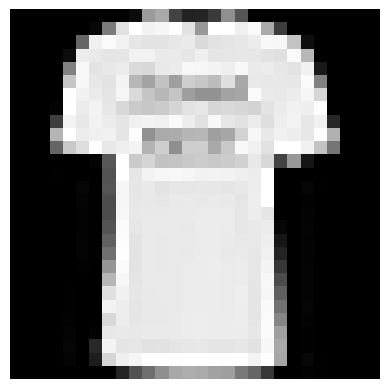

In [ ]:
import matplotlib.pyplot as plt
import random
# Select the image index to display
image_index = random.randint(0, len(train_images) - 1)

# Display the image from the test set
plt.imshow(train_images[image_index], cmap='gray')
plt.axis('off')  # Remove axis labels
plt.show()

In [ ]:
noise_factor = 0.5
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)

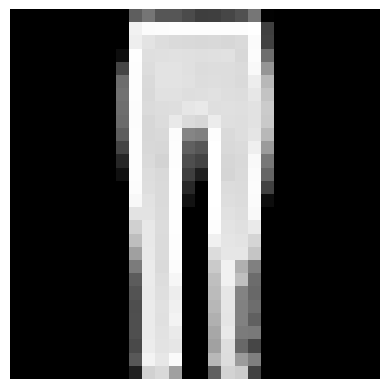

In [ ]:
import matplotlib.pyplot as plt
import random
# Select the image index to display
image_index = random.randint(0, len(test_images) - 1)

# Display the image from the test set
plt.imshow(test_images[image_index], cmap='gray')
plt.axis('off')  # Remove axis labels
plt.show()

In [ ]:
input_shape = (28, 28, 1)
latent_dim = 64

In [ ]:
encoder_input = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoder_output = MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
from tensorflow.keras.layers import UpSampling2D
# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoder_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# Create the autoencoder model
autoencoder = Model(encoder_input, decoder_output)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError())

# Print the autoencoder summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
# Train the autoencoder
# Train the autoencoder
autoencoder.fit(train_images_noisy, train_images, epochs=10, batch_size=128, validation_data=(test_images, test_images))


Epoch 1/10
469/469 [==============================] - 97s 204ms/step - loss: 0.0469 - val_loss: 0.0345
Epoch 2/10
469/469 [==============================] - 93s 199ms/step - loss: 0.0279 - val_loss: 0.0350
Epoch 3/10
469/469 [==============================] - 94s 201ms/step - loss: 0.0261 - val_loss: 0.0357
Epoch 4/10
469/469 [==============================] - 93s 199ms/step - loss: 0.0252 - val_loss: 0.0336
Epoch 5/10
469/469 [==============================] - 94s 200ms/step - loss: 0.0245 - val_loss: 0.0358
Epoch 6/10
469/469 [==============================] - 93s 198ms/step - loss: 0.0240 - val_loss: 0.0358
Epoch 7/10
469/469 [==============================] - 93s 199ms/step - loss: 0.0236 - val_loss: 0.0356
Epoch 8/10
469/469 [==============================] - 93s 198ms/step - loss: 0.0231 - val_loss: 0.0324
Epoch 9/10
469/469 [==============================] - 93s 198ms/step - loss: 0.0228 - val_loss: 0.0323
Epoch 10/10
469/469 [==============================] - 93s 198ms/step - l

1/1 [==============================] - 0s 23ms/step


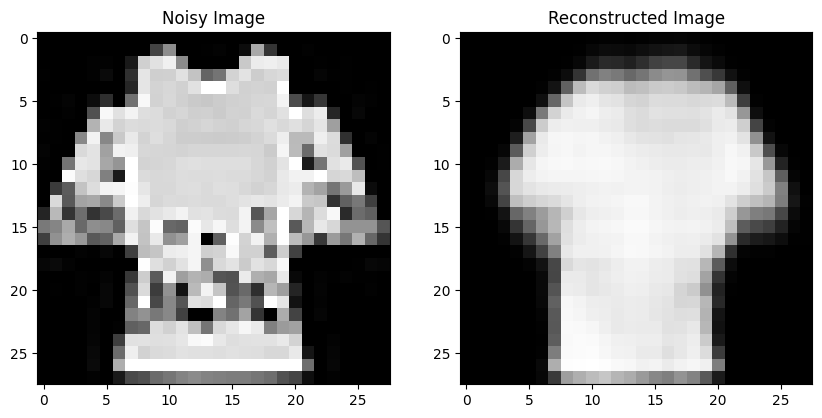

In [ ]:
# Select an image from the test set
import random
image_index = random.randint(0, len(test_images) - 1)
input_image = test_images[image_index]

# Reshape the image to match the input shape of the autoencoder
input_image = np.reshape(input_image, (1, 28, 28, 1))

# Pass the image through the autoencoder for reconstruction
reconstructed_image = autoencoder.predict(input_image)

# Reshape the reconstructed image to remove the batch dimension
reconstructed_image = np.reshape(reconstructed_image, (28, 28))

# Display the original noisy image and the reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image[0, :, :, 0], cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()


In [ ]:
mse = np.mean(np.square(test_images - reconstructed_images))

print("Mean Squared Error (MSE):", mse)